In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:
df = pd.read_csv('/content/drive/MyDrive/for jobs/GG Colab/Project/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Loại bỏ những giá trị nằm ngoài q1 và q3

In [17]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


## Line Plot
Tạo một draw_line_plot function sử dụng Matplotlib để vẽ biểu đồ đường. Tiêu đề phải là Daily freeCodeCamp Forum Page Views 5/2016-12/2019. Nhãn trên trục x phải là Date và nhãn trên trục y phải là Page Views.

In [24]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='blue', linewidth=1, alpha=0.4)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig

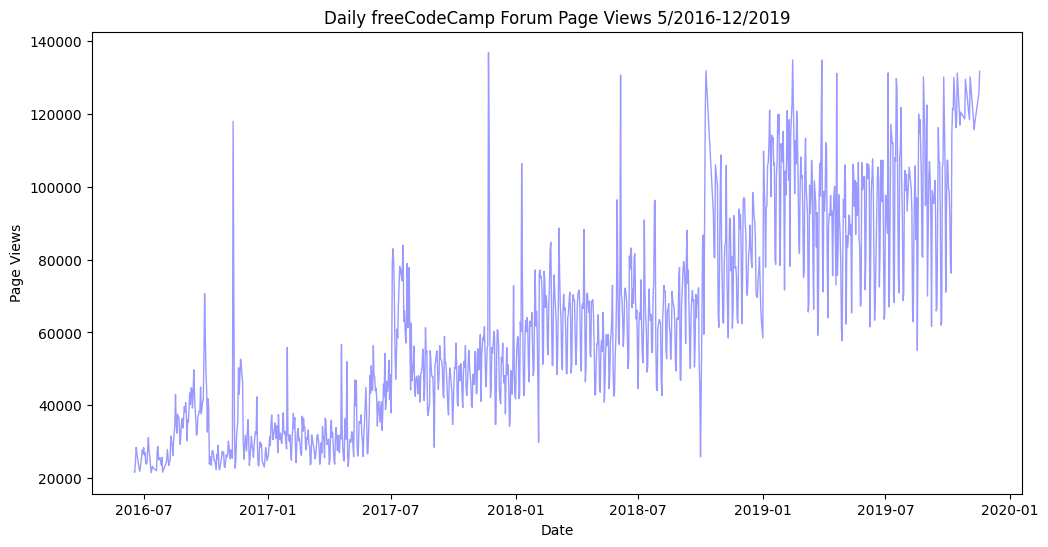

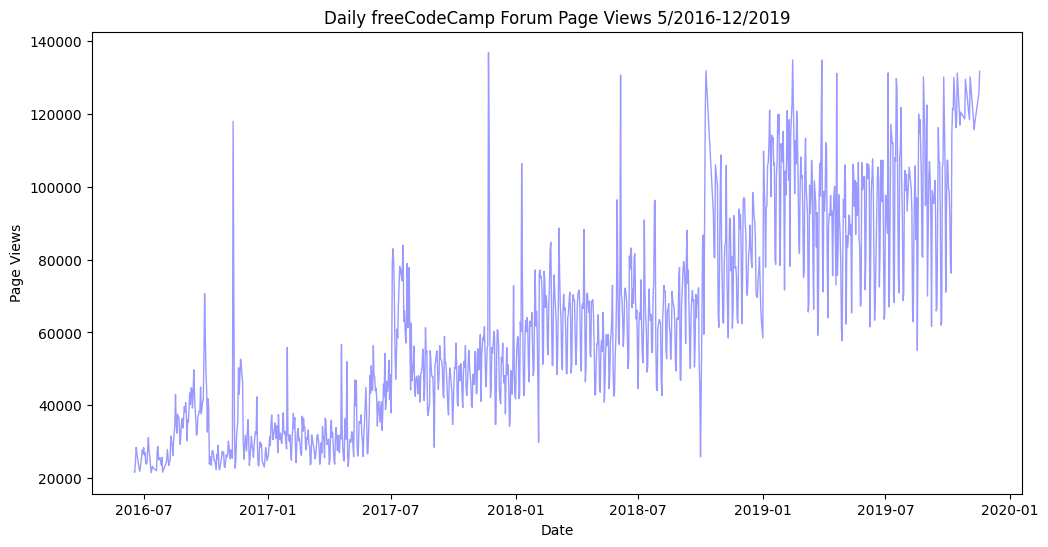

In [25]:
draw_line_plot()

## Bar Plot
Tạo một draw_bar_plot function vẽ biểu đồ thanh. Hàm này sẽ hiển thị số lượt xem trang trung bình hàng ngày cho mỗi tháng được nhóm theo năm. Chú giải sẽ hiển thị nhãn tháng và có tiêu đề là Months. Trên biểu đồ, nhãn trên trục x sẽ là Years và nhãn trên trục y sẽ là Average Page Views.

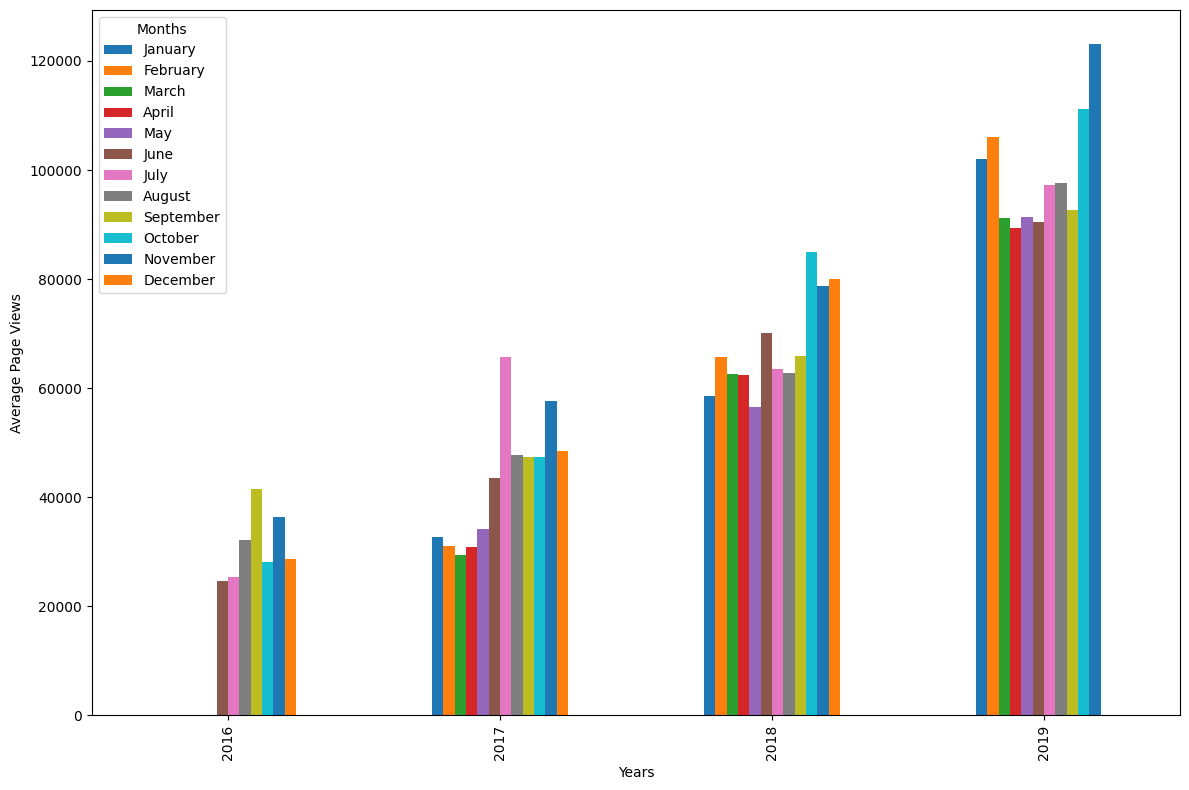

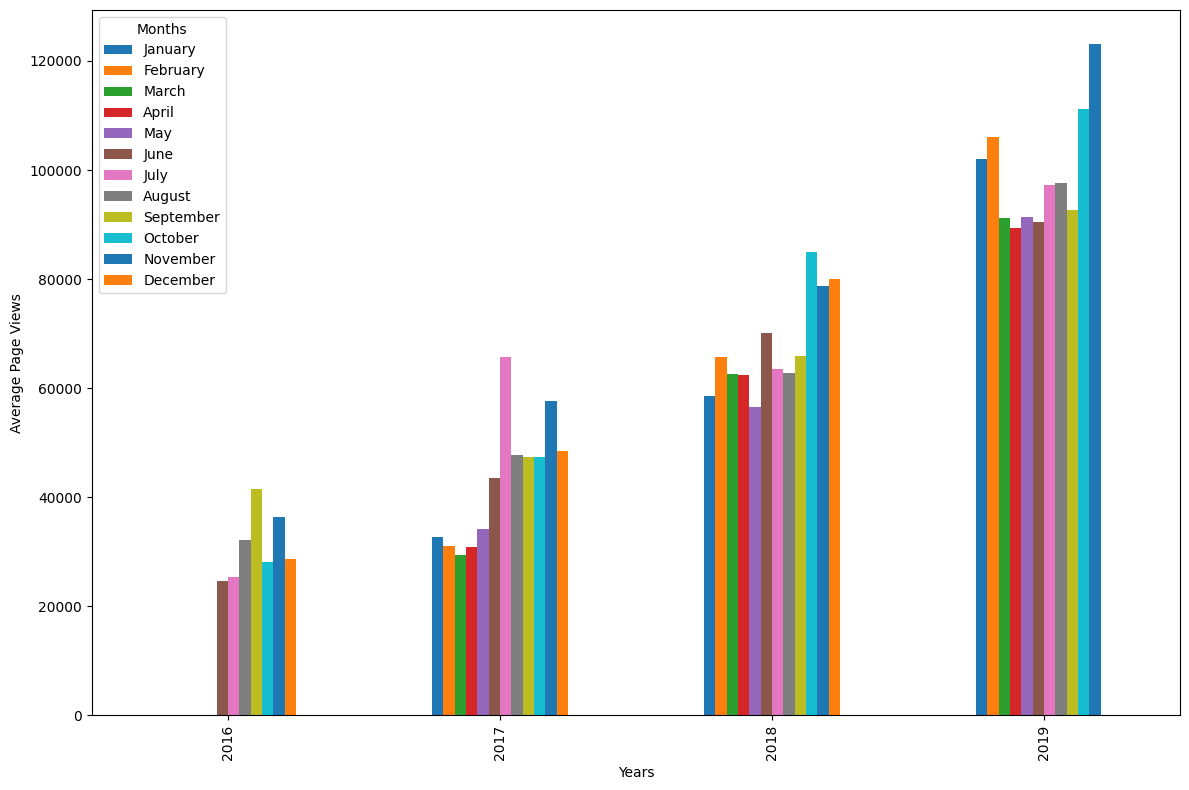

In [33]:

def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    g = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

    months_order = ['January','February','March','April','May','June',
                    'July','August','September','October','November','December']

    pivot = g.pivot(index='year', columns='month', values='value')
    pivot = pivot[months_order]  # reorder months
    pivot.columns.name = 'Months'  # ensure legend label exists

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8))
    pivot.plot(kind='bar', ax=ax)

    ax.set_xlabel('Years')  # fixed plural
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')

    fig.tight_layout()
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

## Box Plot
Tạo một draw_box_plot function sử dụng Seaborn để vẽ hai biểu đồ hộp liền kề. Các biểu đồ hộp này sẽ thể hiện cách các giá trị được phân bổ trong một năm hoặc tháng nhất định và cách so sánh chúng theo thời gian. Tiêu đề của biểu đồ đầu tiên Year-wise Box Plot (Trend) và tiêu đề của biểu đồ thứ hai nên là Month-wise Box Plot (Seasonality). Đảm bảo nhãn tháng ở dưới cùng bắt đầu tại Janvà trục x và y được gắn nhãn chính xác. Mẫu soạn sẵn bao gồm các lệnh để chuẩn bị dữ liệu.

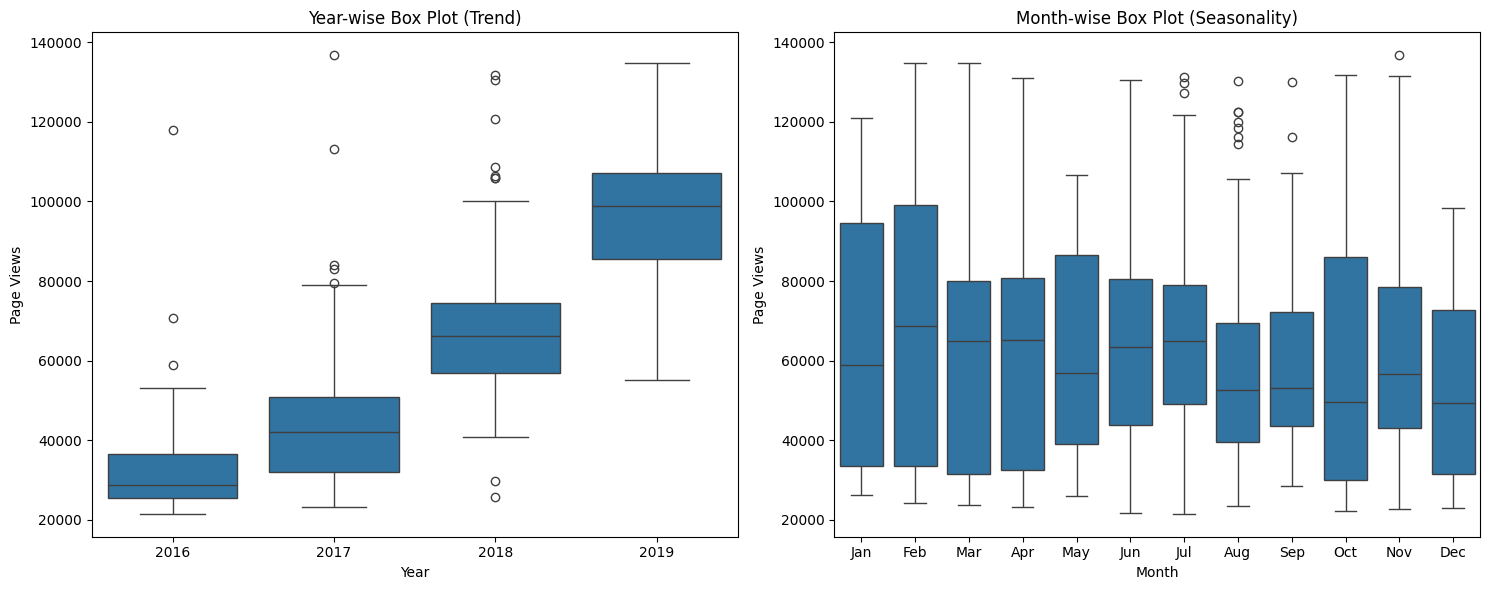

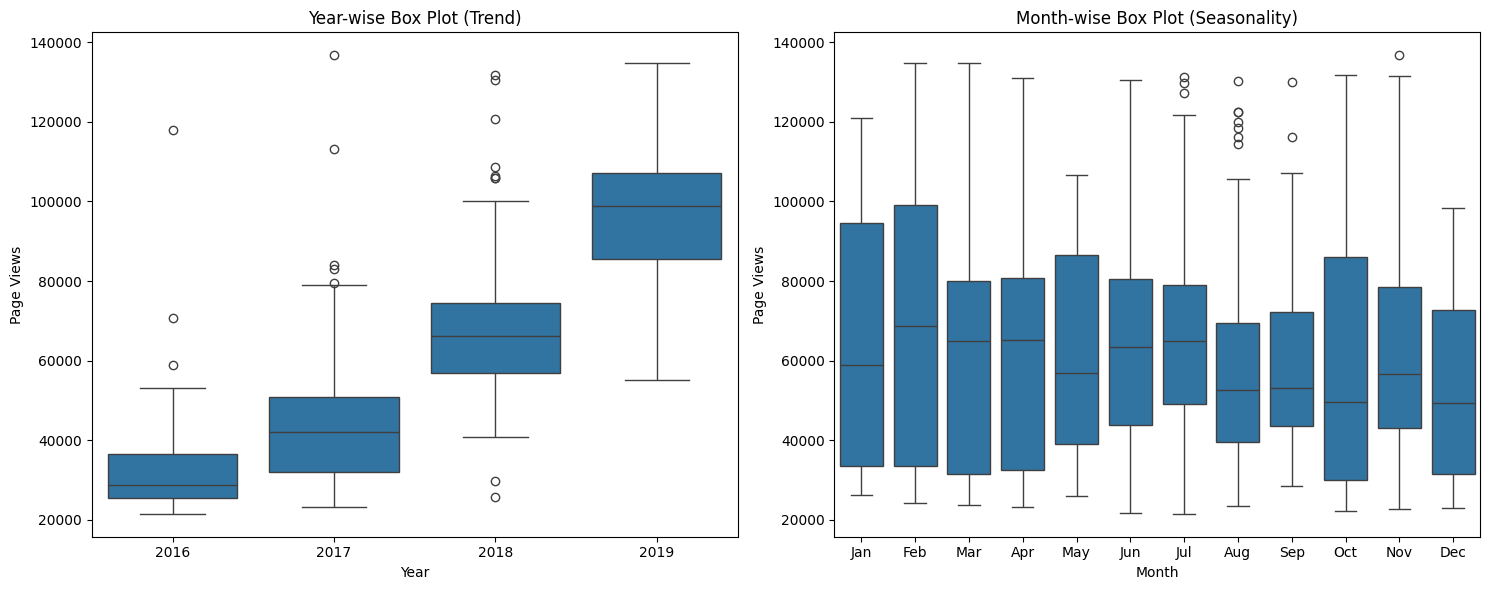

In [31]:
def draw_box_plot():
    df_box = df.copy().reset_index()
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()